In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
c_cycle=("#3498db","#e74c3c","#1abc9c","#9b59b6","#f1c40f","#ecf0f1","#34495e",
                  "#446cb3","#d24d57","#27ae60","#663399", "#f7ca18","#bdc3c7","#2c3e50")
mpl.rc('font', family='Bitstream Vera Sans', size=20)
mpl.rc('lines', linewidth=2,color="#2c3e50")
mpl.rc('patch', linewidth=0,facecolor="none",edgecolor="none")
mpl.rc('text', color='#2c3e50')
mpl.rc('axes', facecolor='none',edgecolor="none",titlesize=25,labelsize=15,color_cycle=c_cycle,grid=False)
mpl.rc('xtick.major',size=10,width=0)
mpl.rc('ytick.major',size=10,width=0)
mpl.rc('xtick.minor',size=10,width=0)
mpl.rc('ytick.minor',size=10,width=0)
mpl.rc('ytick',direction="out")
mpl.rc('grid',color='#c0392b',alpha=0.3,linewidth=1)
mpl.rc('legend',numpoints=3,fontsize=15,borderpad=0,markerscale=3,labelspacing=0.2,frameon=False,framealpha=0.6,handlelength=1,handleheight=0.5)
mpl.rc('figure',figsize=(10,6),dpi=80,facecolor="none",edgecolor="none")
mpl.rc('savefig',dpi=100,facecolor="none",edgecolor="none")

In [3]:
weather = pd.read_table("daily_weather.tsv")
usage = pd.read_table("usage_2012.tsv")
stations = pd.read_table("stations.tsv")

In [4]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [5]:
weather['date'] = pd.to_datetime(weather['date'])

In [6]:
month_rental = weather.groupby(weather['date'].dt.month)['total_riders'].sum()

In [7]:
mean = weather.groupby('season_desc')['temp'].mean()

###To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.

In [8]:
count = usage['station_start'].value_counts()

In [9]:
average_rental_df = DataFrame({ 'average_rental' : count / 365})

In [10]:
average_rental_df

,average_rental
Massachusetts Ave & Dupont Circle NW,191.369863
Columbus Circle / Union Station,151.084932
15th & P St NW,135.386301
17th & Corcoran St NW,119.306849
14th & V St NW,110.252055
Adams Mill & Columbia Rd NW,110.087671
Thomas Circle,109.865753
Eastern Market Metro / Pennsylvania Ave & 7th St SE,108.884932
16th & Harvard St NW,95.531507
21st & I St NW,91.000000


###a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [11]:
from sklearn import linear_model

In [12]:
indexed_avg_df = DataFrame(average_rental_df.index, columns=['station'])

In [13]:
indexed_avg_df['avg_rentals'] = average_rental_df.values

In [14]:
indexed_avg_df['station'] = average_rental_df.index

In [15]:
avgerage_stations_df = pd.merge(left=indexed_avg_df, right=stations, on='station')

In [16]:
x = avgerage_stations_df[list(avgerage_stations_df.columns.values[8:])]
y = avgerage_stations_df[list(avgerage_stations_df.columns.values[1:2])]

In [17]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

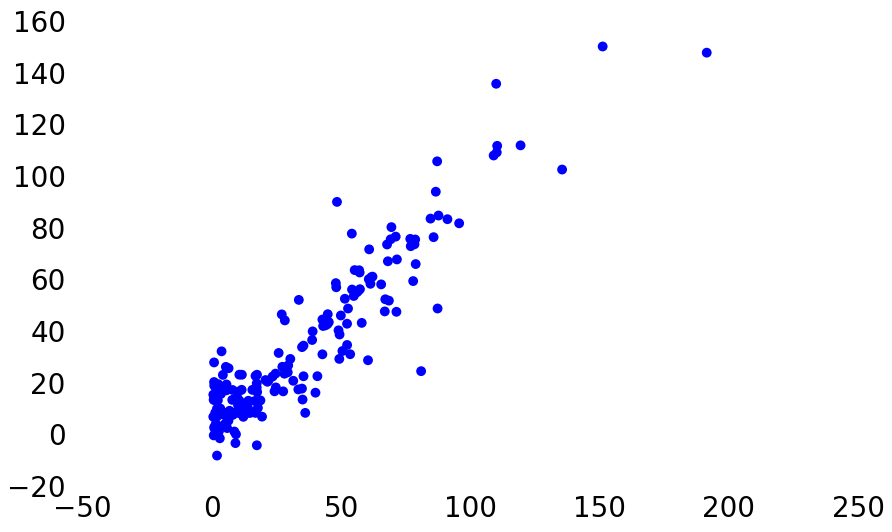

In [18]:
plt.scatter(y, linear_reg.predict(x), s=50)
plt.show()

###c. In this case, there are 129 input variables and only 185 rows which means we're very likely to overfit. Look at the model coefficients and see if anything jumps out as odd.

In [19]:
linear_reg.coef_

array([[  2.31721704e+00,  -2.14932061e-01,   5.55710831e-02,
         -6.33034472e+01,   1.95461168e+00,  -4.30632265e+00,
          5.51850630e+00,   1.90775768e+00,  -3.78606353e-01,
          7.83669551e-12,   2.47157737e+00,   6.92093575e+01,
          4.55079500e+00,   5.25217425e-12,  -1.24598788e-12,
          5.24796402e+00,   1.26818374e-11,   4.71211429e+00,
          9.12405995e+00,  -3.03680165e+00,   3.23088610e+00,
         -3.75439309e+01,   2.80098019e+01,  -3.85041448e+01,
         -1.56214076e+01,   2.12991919e+01,   1.52771531e+00,
          3.03238328e+00,  -4.28998558e+00,   8.94580818e+00,
          2.12991919e+01,  -2.85293190e-01,   3.24996230e+00,
          1.29635558e+01,   4.81656870e+00,  -1.97777901e+00,
         -3.44530831e+01,  -1.67244489e+01,   5.32312313e+00,
          5.04749123e+00,   1.14823383e+01,  -5.85187161e+00,
          1.48491231e+02,  -5.72315824e+00,  -1.28867680e+01,
          1.82383250e+02,  -4.46662968e-02,   4.04835029e-01,
        

###d. Go back and split the data into a training set and a test set. Train the model on the training set and evaluate it on the test set. How does it do?

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [22]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

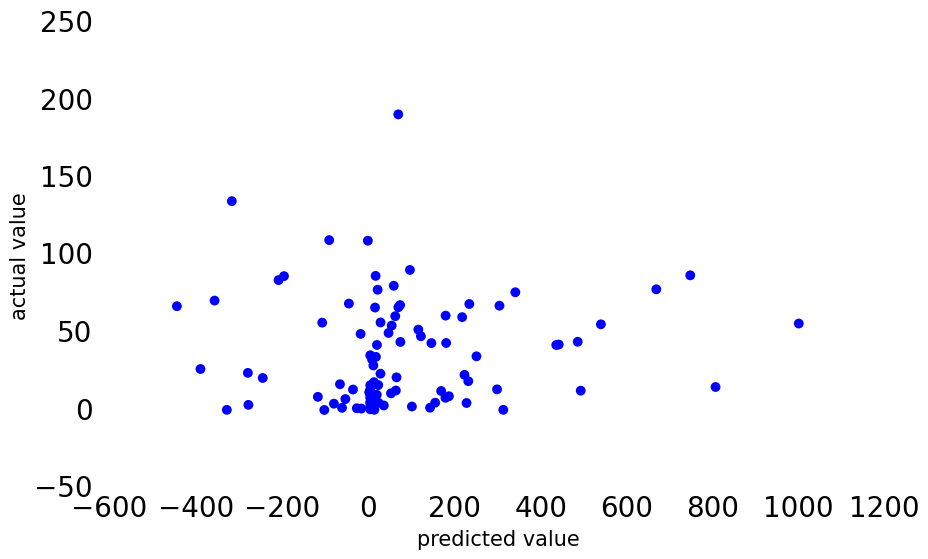

In [23]:
plt.scatter(lin_reg.predict(x_test), y_test, s=50)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

It looks too scattered and doesn't look like accurate.

###1.a. Since we have so many variables, this is a good candidate for regularization. In particular, since we'd like to eliminate a lot of them, lasso seems like a good candidate. Build a lasso model on your training data for various values of alpha. Which variables survive?

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso_model = Lasso(alpha=0.1)

In [26]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso_model.coef_

array([  2.11891665,  -8.31310629,   1.30158042,  12.38513702,
         1.81502454,  -3.97056337,   4.92886595,   0.        ,
         2.41843936,   0.        ,   2.52385879,   0.        ,
        -4.82539534,   0.        ,   0.        ,  -3.25661618,
         0.        ,   0.        ,  -0.52538975,  -3.47180753,
         3.92691686,  -0.        ,  29.8695751 ,   0.        ,
        -0.        ,  -0.        ,  -1.55760355,   2.31622019,
        -3.36219043,   1.68220631,  -0.        ,  -0.        ,
         2.37665676,  -0.26992042,   5.00393918,  -4.84679097,
        -0.        , -31.15780614,   1.25142142,   6.35268305,
        11.88400288,  -6.62417012,   0.        ,   0.        ,
        -0.        ,  25.2336119 ,   0.        ,  16.70356365,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        , -10.01163694,  -0.        ,   6.6717517 ,
        -0.        ,  29.72285205,   0.        ,   0.        ,
         3.19781292,  -0.        ,  -4.31999142,  -2.19

In [28]:
lasso_model = Lasso(alpha=0.5)

In [29]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso_model.coef_

array([  7.41776749e-01,  -6.15480041e+00,   1.27822217e+00,
         0.00000000e+00,   1.13284481e-02,  -5.06650708e+00,
         7.38451675e+00,   0.00000000e+00,   2.83386812e+00,
         0.00000000e+00,   3.16726479e+00,   0.00000000e+00,
        -2.23151031e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -3.54215927e+00,   2.80925056e+00,
        -0.00000000e+00,   2.14000793e+01,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -2.88470565e-01,
         2.12348288e+00,   2.89866304e-01,   4.90382847e-01,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   4.54885183e+00,   0.00000000e+00,
         0.00000000e+00,  -1.69598679e+01,   0.00000000e+00,
         0.00000000e+00,   9.45091113e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.96415763e+00,
        -0.00000000e+00,

In [31]:
lasso_model = Lasso(alpha=1)

In [32]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
lasso_model.coef_

array([  0.37181023,  -4.61114302,   1.30076133,  -0.        ,
         0.        ,  -5.27229216,   7.96406457,   0.        ,
         2.65616947,   0.        ,   3.02013032,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -2.88227526,
         2.72890434,  -0.        ,  14.34804695,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   2.37318045,
         0.54716315,   0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,   3.83022461,   0.        ,
         0.        ,  -2.96010342,  -0.        ,   0.        ,
         4.83249053,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -3.95111226,  -0.  

###b. How does this model perform on the test set?

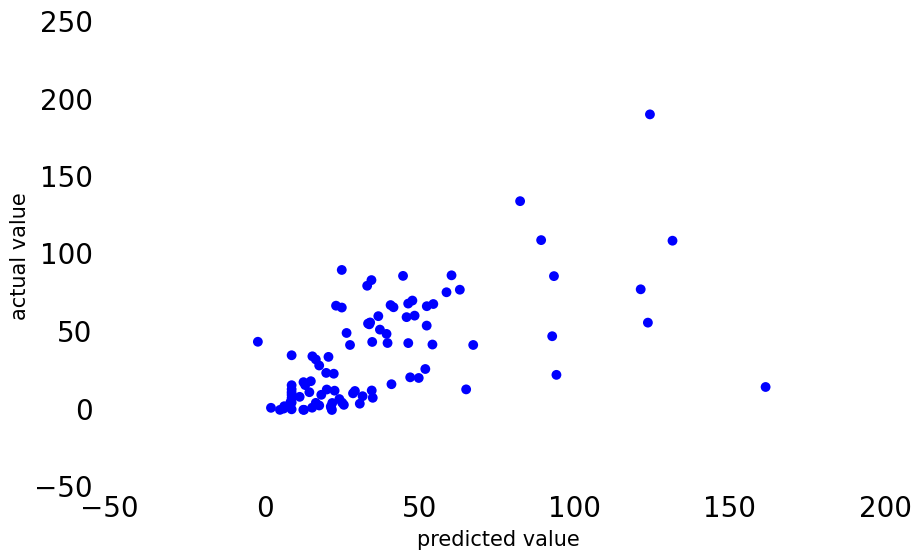

In [34]:
plt.scatter(lasso_model.predict(x_test), y_test, s=50)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

I can see some correlation in this.

###1.No matter how high I make alpha, the coefficient on crossing ("number of nearby crosswalks") never goes away. Try a simple linear regression on just that variable.

In [35]:
x = avgerage_stations_df[list(avgerage_stations_df.columns.values[111:112])]
y = avgerage_stations_df[list(avgerage_stations_df.columns.values[1:2])]
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

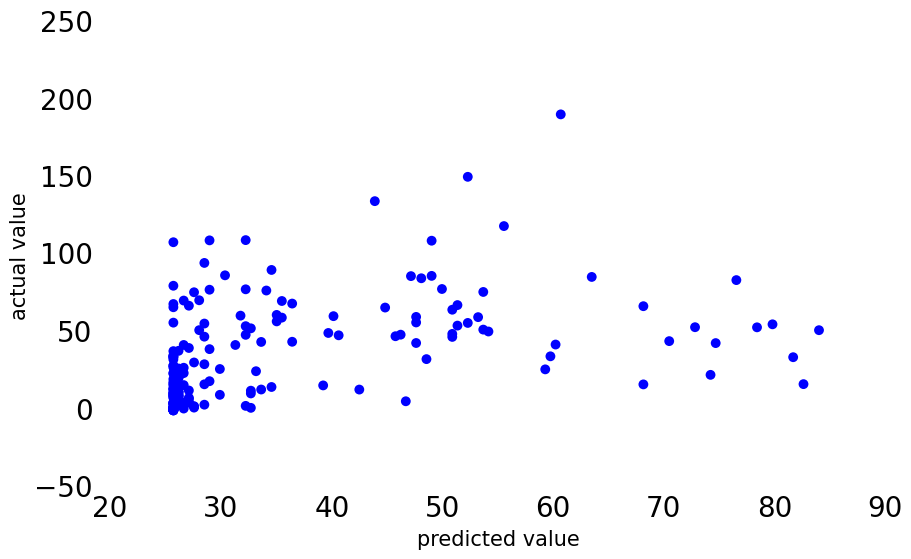

In [36]:
plt.scatter(lin_regr.predict(x), y, s=50)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

This looks like reasonably correlated.